## 이진 분류 예제 - 영화 리뷰 분류

### 데이터 셋 로드

In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
D:\Anaconda\envs\gpu\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\envs\gpu\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(train_labels[0])

1


In [5]:
max([max(sequence) for sequence in train_data])        #가장 많이 사용되는 단어 10000개로 제한

9999

### 인덱스를 도로 영어단어로 바꾸는 방법

In [6]:
word_index = imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])      #정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review=' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])  #리뷰 디코딩. 0,1,2번 인덱스는 패딩, 문서시작, 등록되지 않은 단어인 경우를 위한 인덱스이기 때문에 3을 뺌.

In [7]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 신경망에 숫자를 주입할 수는 없으므로 리스트를 텐서로 바꾸기 (원핫인코딩 사용)

In [9]:
import numpy as np
def vectorize_sequences (sequences, dimension = 10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [24]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [19]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


### 신경망 모델 만들기

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### 원본 데이터에서 샘플을 떼어 검증할 세트를 만드기

In [25]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train = y_train[10000:]

### 모델을 512개의 샘플씩 배치를 만들어 20번 epochs동안 훈련시킴 (모든 샘플에 대해 20번 반복)

#### 이와 동시에 따로 떼어놓은 1만개의 샘플에서 손실과 정확도 측정

In [26]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 298us/step - loss: 0.5121 - accuracy: 0.7940 - val_loss: 0.3917 - val_accuracy: 0.8685
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3122 - accuracy: 0.9038 - val_loss: 0.3243 - val_accuracy: 0.8721
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2312 - accuracy: 0.9267 - val_loss: 0.2983 - val_accuracy: 0.8789
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1858 - accuracy: 0.9397 - val_loss: 0.2947 - val_accuracy: 0.8818
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1543 - accuracy: 0.9515 - val_loss: 0.2775 - val_accuracy: 0.8894
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1259 - accuracy: 0.9627 - val_loss: 0.2964 - val_accuracy: 0.8827
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [28]:
history_dict=history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


### matplotlib 이용해 결과 그리기

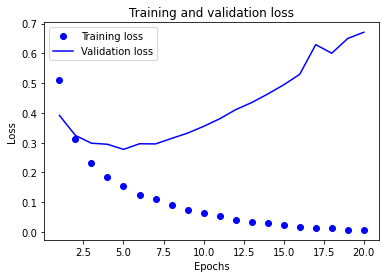

In [37]:
import matplotlib.pyplot as plt
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')       #bo는 파란 점 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')   #b는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

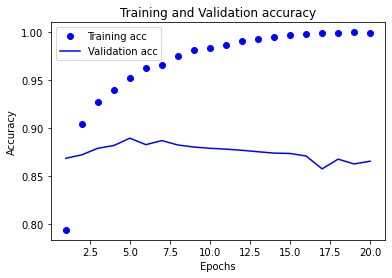

In [40]:
plt.clf()            #그래프 초기화
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4번째 epoch 이후부터 validation data의 손실이 느는데 이는 모델이 훈련 데이터의 과대적합(overfitting) 되었기 때문. 새로운 신경망을 4번의 epochs 동안만 훈련시키면 과대적합을 완화할 수 있음.

### epoch를 4번으로 줄이고 모델을 다시 훈련시키기

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.4593 - accuracy: 0.8230
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2651 - accuracy: 0.9081
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2013 - accuracy: 0.9303
Epoch 4/4
25000/25000 [==============================] - 34s 1ms/step


In [42]:
print(results)

[0.2879361201381683, 0.8866400122642517]


### 최종적으로 약 88%의 정확도를 얻었음

In [43]:
model.predict(x_test)

array([[0.21629284],
       [0.99951077],
       [0.8878741 ],
       ...,
       [0.16433263],
       [0.08924166],
       [0.7165961 ]], dtype=float32)